In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [15]:
data = pd.read_csv('BTC2019-2024.csv')
close_prices = data['Close']

In [16]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 8:2
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

In [17]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [18]:
# Dự báo cho tập test
forecast_test = model.predict(start=test.index[0], end=test.index[-1])

In [19]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, forecast_test))
mape_test = mean_absolute_percentage_error(test, forecast_test)
mse_test = mean_squared_error(test, forecast_test)

In [20]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 19494.10431792753
MAPE: 53.55607941133803
MSE: 380020103.1582408


### Dự báo

#### Dự báo 30 ngày

In [21]:
# Dự báo cho 30 ngày tiếp theo
forecast_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(forecast_30_days)

1816    28765.725234
1817    28869.195347
1818    29536.349820
1819    27959.131353
1820    25090.879457
1821    25336.023683
1822    23731.405317
1823    23294.196629
1824    23120.297865
1825    22516.341997
1826    24705.265883
1827    24193.784472
1828    25191.232714
1829    24145.537025
1830    24448.334031
1831    24420.679827
1832    25416.580234
1833    25490.073505
1834    26648.755898
1835    27196.475122
1836    28057.932947
1837    26316.054189
1838    28531.370999
1839    27343.242883
1840    25706.072544
1841    25927.399459
1842    27025.574601
1843    26486.885084
1844    27167.972548
1845    27115.085810
dtype: float64


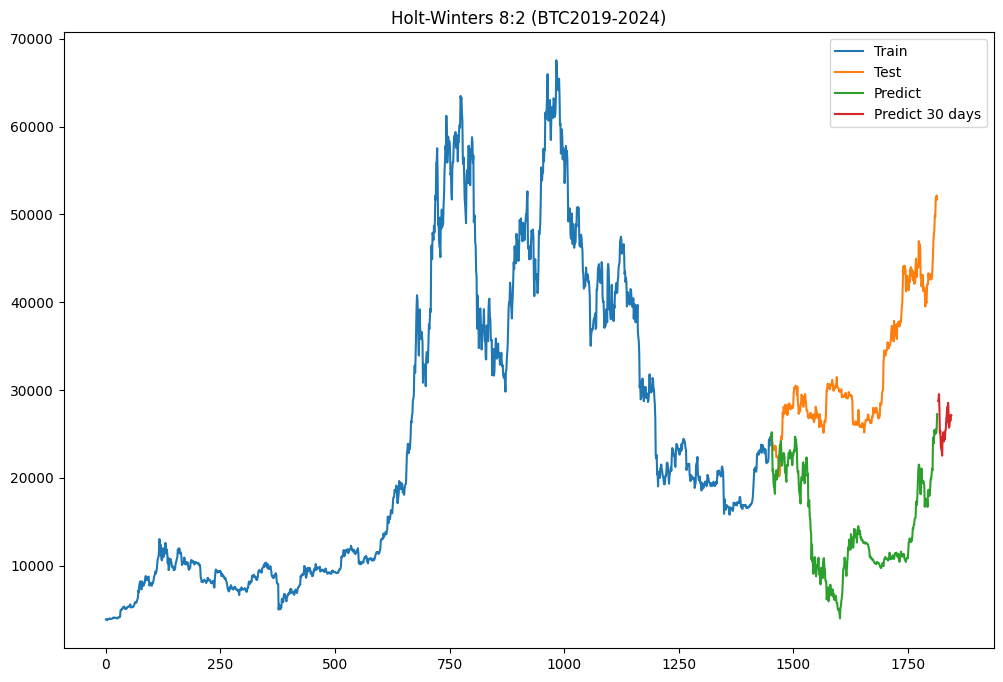

In [22]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_30_days.index, forecast_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [23]:
# Dự báo cho 60 ngày tiếp theo
forecast_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(forecast_60_days)

1816    28765.725234
1817    28869.195347
1818    29536.349820
1819    27959.131353
1820    25090.879457
1821    25336.023683
1822    23731.405317
1823    23294.196629
1824    23120.297865
1825    22516.341997
1826    24705.265883
1827    24193.784472
1828    25191.232714
1829    24145.537025
1830    24448.334031
1831    24420.679827
1832    25416.580234
1833    25490.073505
1834    26648.755898
1835    27196.475122
1836    28057.932947
1837    26316.054189
1838    28531.370999
1839    27343.242883
1840    25706.072544
1841    25927.399459
1842    27025.574601
1843    26486.885084
1844    27167.972548
1845    27115.085810
1846    26674.386027
1847    24967.182813
1848    25334.587384
1849    24477.304464
1850    23877.490899
1851    25576.117737
1852    25835.875953
1853    25674.612162
1854    26379.425946
1855    27183.759358
1856    27155.111249
1857    27291.270953
1858    27486.252575
1859    26524.089770
1860    27125.280662
1861    27192.493903
1862    26952.278810
1863    25780

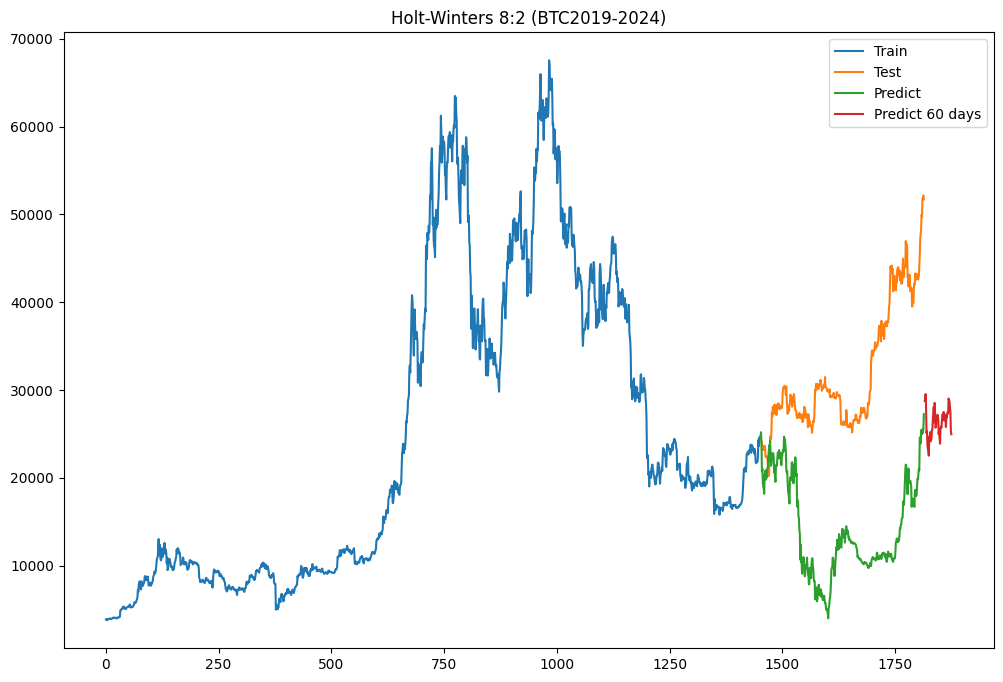

In [24]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_60_days.index, forecast_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [25]:
# Dự báo cho 60 ngày tiếp theo
forecast_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(forecast_90_days)

1816    28765.725234
1817    28869.195347
1818    29536.349820
1819    27959.131353
1820    25090.879457
            ...     
1901    19934.684135
1902    19740.283788
1903    18364.880301
1904    18019.666405
1905    15008.740442
Length: 90, dtype: float64


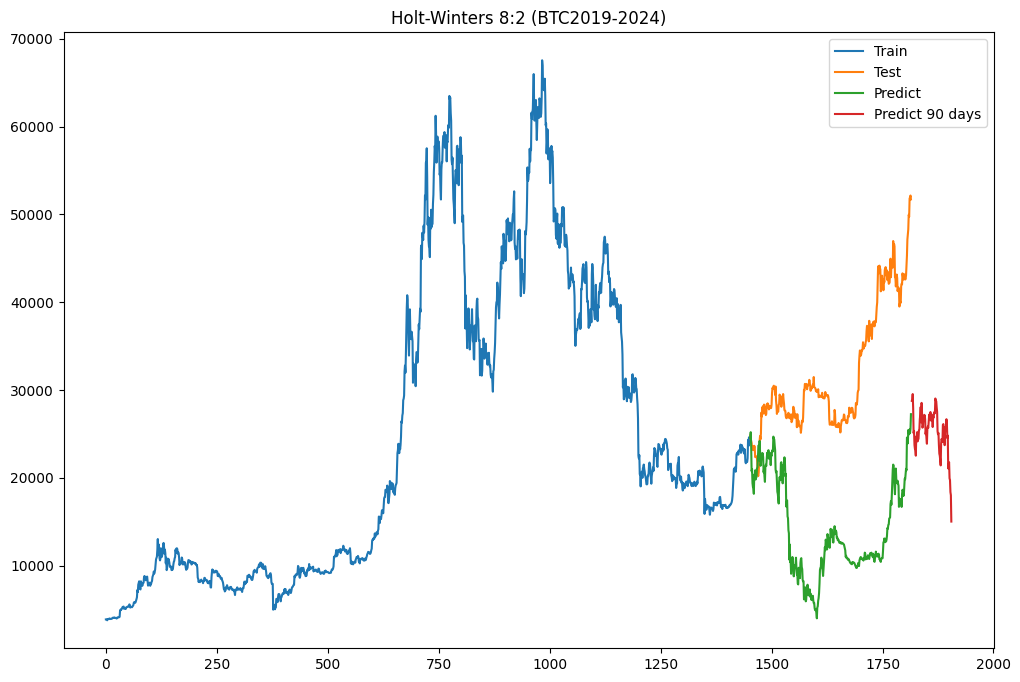

In [26]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_90_days.index, forecast_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()